In [272]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [338]:

pd.set_option("display.max.columns", None)
original_df = pd.read_table("ikea_kommun_data.txt", encoding="ISO-8859-1")
print("The dimension of our data frame is: ", original_df.shape)
original_df.head(10)


The dimension of our data frame is:  (207, 12)


,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0
8,125,2010,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0


In [339]:
#checking missing values in dataset
original_df.isnull().sum()

Kommun_code              0
Year                     0
Kommun_name              0
Revenue                  0
Employee                 0
Population               0
Population_University    0
Percent_University       0
Productivity             0
SalesIndex               0
Infrast                  0
Border                   0
dtype: int64

In [340]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


In [341]:
sample_df = original_df.copy()

In [342]:
#drop categorical and irrelevant variable 
sample_df.drop(["Kommun_name"], axis=1, inplace=True)
sample_df.drop(["Kommun_code"], axis=1, inplace=True)
sample_df.drop(["Year"], axis=1, inplace=True)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Revenue                207 non-null    int64  
 1   Employee               207 non-null    int64  
 2   Population             207 non-null    int64  
 3   Population_University  207 non-null    int64  
 4   Percent_University     207 non-null    float64
 5   Productivity           207 non-null    float64
 6   SalesIndex             207 non-null    float64
 7   Infrast                207 non-null    int64  
 8   Border                 207 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 14.7 KB


In [343]:
sample_df.head(5)

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


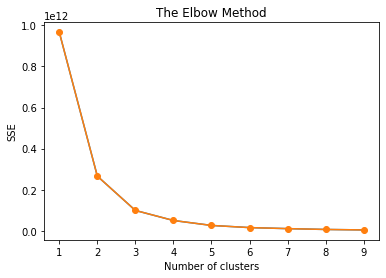

In [344]:
sse = []
k_range = range(1,10)
for i in k_range:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(sample_df)
    sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.plot(k_range,sse, marker = 'o')

plt.ylabel('SSE')
plt.show()

In [345]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalered_data = scaler.fit_transform(sample_df)

In [346]:
#define PCA for dimentionality reduction
pca = PCA()
# apply transform to dataset
X = pca.fit_transform(scalered_data)

In [347]:
new_df = pd.DataFrame(data=X,columns = ['pc0', 'pc1', 'pc2', 'pc3','pc4','pc5', 'pc6', 'pc7', 'pc8'])
new_df.describe()
#pd.DataFrame(new_df).describe()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
count,2.070000e+02,2.070000e+02,2.070000e+02,207.000000,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02
mean,5.148860e-17,-1.716287e-17,8.581434e-18,0.000000,-1.072679e-17,-1.394483e-17,-5.363396e-19,4.827057e-17,-2.013907e-17
std,2.318191e+00,1.079789e+00,9.622020e-01,0.919593,8.125386e-01,2.326858e-01,1.164714e-01,6.574472e-02,7.089283e-10
min,-1.231304e+00,-1.976287e+00,-2.680541e+00,-3.358468,-2.804842e+00,-9.327267e-01,-4.062160e-01,-3.129847e-01,-1.212017e-09
25%,-8.760310e-01,-5.049856e-01,-4.362552e-01,-0.340831,-5.179930e-01,-8.851415e-02,-6.231553e-02,-1.847275e-02,-6.100360e-10
50%,-5.802950e-01,-1.615282e-01,8.340509e-03,0.003856,-2.311642e-01,-3.643599e-02,-2.639369e-02,9.540610e-04,-9.833735e-11
75%,5.617231e-02,2.304460e-01,3.004122e-01,0.306129,2.866238e-01,3.194643e-02,4.769427e-02,2.154653e-02,5.623323e-10
max,2.772002e+01,6.220053e+00,3.826219e+00,4.510091,3.184815e+00,1.337844e+00,4.446312e-01,3.895966e-01,1.408627e-09


In [348]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [5.94227668e-01 1.28923539e-01 1.02373346e-01 9.35074320e-02
 7.30032728e-02 5.98679313e-03 1.50000612e-03 4.77943007e-04
 5.55723870e-20]


In [349]:
X

array([[-4.42136565e-01,  6.22005276e+00, -4.68619043e-02, ...,
        -8.61993989e-02,  1.58544506e-02, -1.21201687e-09],
       [ 1.74872404e+00,  3.82759777e-01, -1.05693289e+00, ...,
        -1.01138329e-01,  9.54061036e-04, -9.38001627e-10],
       [ 2.45794831e+00,  3.87207886e-01, -1.30315164e+00, ...,
        -5.60977650e-02,  7.36196797e-02, -6.99408664e-10],
       ...,
       [ 3.71028818e+00,  1.13391250e-01, -9.37334581e-01, ...,
         1.36554922e-01, -3.51702437e-02, -7.82668099e-10],
       [-7.58784763e-01, -4.05750823e-01,  2.12416338e-01, ...,
         4.28160573e-02,  2.07112282e-02, -5.72269396e-10],
       [-8.53877065e-01,  8.41643513e-02,  6.41594720e-02, ...,
        -4.72768765e-02,  4.60439508e-03,  8.20041259e-10]])

In [350]:
kmeans = KMeans(n_clusters=3).fit(X)
lables = kmeans.predict(X)

In [351]:
lables

array([0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0])

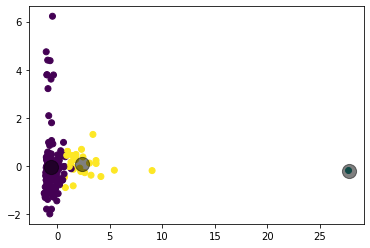

In [352]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_,cmap='viridis') 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [353]:
ikea = original_df.iloc[:,2:12]
ikea

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
...,...,...,...,...,...,...,...,...,...,...
202,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
204,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0
205,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


In [354]:
ikea['has_ikea'] = pd.Series(lables)
ikea.head(10)

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
0,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,0
1,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,2
2,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2
3,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0
4,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0
5,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,0
6,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,0
7,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,2
8,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0,0
9,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,2


In [355]:
kmeans.inertia_

814.5669138171097

In [356]:
sse

[966183407689.2876,
 266297005084.94016,
 99464857037.18509,
 50588024690.884735,
 26616710506.523132,
 16045315887.4141,
 11044280820.978285,
 6967280980.256289,
 4753750418.740351]

In [357]:
cluster1=ikea[ikea.has_ikea==0]
cluster2=ikea[ikea.has_ikea==1]
cluster3=ikea[ikea.has_ikea==2]

In [358]:
c1 = cluster1.shape
c2 = cluster2.shape
c3 = cluster3.shape

print("Cluster 1 : ", c1)
print("Cluster 2 : ", c2)
print("Cluster 3 : ", c3)

Cluster 1 :  (177, 11)
Cluster 2 :  (1, 11)
Cluster 3 :  (29, 11)


In [359]:
p1 = cluster1["Population"].max()
p2 = cluster2["Population"].max()
p3 = cluster3["Population"].max()

print("Max Population in Cluster 1 : ", p1)
print("Max Population in Cluster 2 : ", p2)
print("Max Population in Cluster 3 : ", p3)

Max Population in Cluster 1 :  82608
Max Population in Cluster 2 :  847073
Max Population in Cluster 3 :  298963


In [360]:
cluster1["Infrast"].value_counts()

0    170
1      7
Name: Infrast, dtype: int64

In [361]:
cluster3["Infrast"].value_counts()

0    27
1     2
Name: Infrast, dtype: int64

In [362]:
cluster2["Infrast"].value_counts()

1    1
Name: Infrast, dtype: int64

In [383]:
s1 = cluster1["SalesIndex"].max()
s2 = cluster2["SalesIndex"].max()
s3 = cluster3["SalesIndex"].max()

print("Max Sales Index for Cluster 1: ", s1)
print("Max Sales Index for Cluster 2: ", s2)
print("Max Sales Index for Cluster 3: ", s3)


Max Sales Index for Cluster 1:  237.916478
Max Sales Index for Cluster 2:  3389.665819
Max Sales Index for Cluster 3:  1155.785679


In [384]:
r1 = cluster1["Revenue"].max()
r2 = cluster2["Revenue"].max()
r3 = cluster3["Revenue"].max()

print("Max Revenue for Cluster 1: ", r1)
print("Max Revenue for Cluster 2: ", r2)
print("Max Revenue for Cluster 3: ", r3)

Max Revenue for Cluster 1:  2309
Max Revenue for Cluster 2:  32897
Max Revenue for Cluster 3:  11217


ANALYSIS OF CLUSTERS BASED ON POPULATION

In [373]:
sort_population1 = cluster1.sort_values("Population", ascending=False)
top_three_kommuns_population1 = sort_population1["Kommun_name"].head(3)
for i in top_three_kommuns_population1:
    display(cluster1.loc[cluster1["Kommun_name"] == i])
    


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
10,Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0,0,0


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
12,Haninge,1459,1031,77054,6776,0.087938,70.92027,150.333539,0,0,0


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
133,Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0,0,0


In [374]:
sort_population2 = cluster2.sort_values("Population", ascending=False)
top_three_kommuns_population2 = sort_population2["Kommun_name"].head(3)
for i in top_three_kommuns_population2:
    display(cluster2.loc[cluster2["Kommun_name"] == i])

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
19,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,1


In [375]:
sort_population3 = cluster3.sort_values("Population", ascending=False)
top_three_kommuns_population3 = sort_population3["Kommun_name"].head(3)
for i in top_three_kommuns_population3:
    display(cluster3.loc[cluster3["Kommun_name"] == i])

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
117,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,2


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
33,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.59889,0,0,2


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
52,Linköping,5348,2280,146416,26023,0.177733,117.55208,551.051245,0,0,2


ANALYSIS OF CLUSTERS BASED ON SALES INDEX

In [372]:
sort_salesIndex1 = cluster1.sort_values("SalesIndex", ascending=False)
top_three_kommuns_salesIndex1 = sort_salesIndex1["Kommun_name"].head(3)
for i in top_three_kommuns_salesIndex1:
    display(cluster1.loc[cluster1["Kommun_name"] == i])

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
168,Uddevalla,2309,1010,51868,5727,0.110415,114.57143,237.916478,0,0,0


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
171,Trollhättan,2004,1038,55248,5812,0.105198,96.75516,206.489659,0,0,0


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
98,Burlöv,1962,928,16701,1639,0.098138,105.95581,202.162031,0,0,0


In [376]:
sort_salesIndex2 = cluster2.sort_values("SalesIndex", ascending=False)
top_three_kommuns_salesIndex2 = sort_salesIndex2["Kommun_name"].head(3)
for i in top_three_kommuns_salesIndex2:
    display(cluster2.loc[cluster2["Kommun_name"] == i])

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
19,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,1


In [377]:
sort_salesIndex3 = cluster3.sort_values("SalesIndex", ascending=False)
top_three_kommuns_salesIndex3 = sort_salesIndex3["Kommun_name"].head(3)
for i in top_three_kommuns_salesIndex3:
    display(cluster3.loc[cluster3["Kommun_name"] == i])

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
117,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,2


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
9,Huddinge,7153,2374,97453,12795,0.131294,151.0015,737.036192,0,0,2


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
33,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.59889,0,0,2


ANALYSIS OF CLUSTERS BASED ON REVENUE

In [378]:
sort_revenue1 = cluster1.sort_values("Revenue", ascending=False)
top_three_kommuns_revenue1 = sort_revenue1["Kommun_name"].head(3)
for i in top_three_kommuns_revenue1:
    display(cluster1.loc[cluster1["Kommun_name"] == i])

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
168,Uddevalla,2309,1010,51868,5727,0.110415,114.57143,237.916478,0,0,0


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
171,Trollhättan,2004,1038,55248,5812,0.105198,96.75516,206.489659,0,0,0


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
98,Burlöv,1962,928,16701,1639,0.098138,105.95581,202.162031,0,0,0


In [379]:
sort_revenue2 = cluster2.sort_values("Revenue", ascending=False)
top_three_kommuns_revenue2 = sort_revenue2["Kommun_name"].head(3)
for i in top_three_kommuns_revenue2:
    display(cluster2.loc[cluster2["Kommun_name"] == i])

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
19,Stockholm,32897,18795,847073,191585,0.226173,87.7178,3389.665819,1,0,1


In [380]:
sort_revenue3 = cluster3.sort_values("Revenue", ascending=False)
top_three_kommuns_revenue3 = sort_revenue3["Kommun_name"].head(3)
for i in top_three_kommuns_revenue3:
    display(cluster3.loc[cluster3["Kommun_name"] == i])

,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
117,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,2


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
9,Huddinge,7153,2374,97453,12795,0.131294,151.0015,737.036192,0,0,2


,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,has_ikea
33,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.59889,0,0,2
